In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
sales = pd.read_csv('C:/Users/caoba/Desktop/cleaned_sales15162.csv', index_col = 0)

In [31]:
bbl_count = pd.read_csv('bbl_count_500.csv', index_col = 0)

In [32]:
bbl_count.head()

,BBL,year,Borough,id
0,1.000020e+09,2015.0,MN,1
1,1.000020e+09,2016.0,MN,2
2,1.000020e+09,2015.0,MN,3
3,1.000020e+09,2016.0,MN,1
4,1.000020e+09,2015.0,MN,5


In [33]:
sales.head()

,BBL,ZIP_CODE,NEIGHBORHOOD,SALE_PRICE,YEAR,log_price
0,1.000151e+09,10004,FINANCIAL,1150000.0,2015,6.060698
1,1.000151e+09,10004,FINANCIAL,575000.0,2015,5.759668
2,1.000151e+09,10004,FINANCIAL,565000.0,2015,5.752048
3,1.000151e+09,10004,FINANCIAL,675000.0,2015,5.829304
4,1.000151e+09,10004,FINANCIAL,785000.0,2015,5.894870


In [34]:
df = pd.merge(sales, bbl_count,  how='inner', left_on=['BBL','YEAR'], right_on = ['BBL','year'])

In [37]:
df.head()

,BBL,ZIP_CODE,NEIGHBORHOOD,SALE_PRICE,YEAR,log_price,year,Borough,id
0,1.000280e+09,10004,FINANCIAL,713500.0,2015,5.853394,2015.0,MN,186
1,1.000290e+09,10004,FINANCIAL,1325000.0,2015,6.122216,2015.0,MN,110
2,1.000300e+09,10004,FINANCIAL,10000000.0,2015,7.000000,2015.0,MN,56
3,1.000390e+09,10005,FINANCIAL,20125000.0,2015,7.303736,2015.0,MN,148
4,1.000640e+09,10005,FINANCIAL,1937500.0,2015,6.287242,2015.0,MN,52


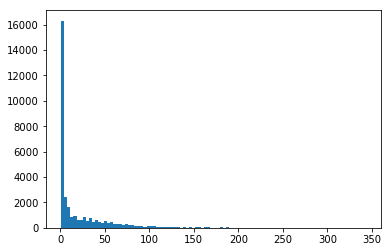

In [35]:
plt.hist(df.id, 100);

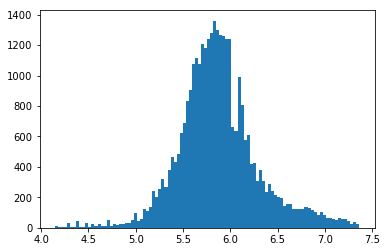

In [17]:
plt.hist(df.log_price, 100);

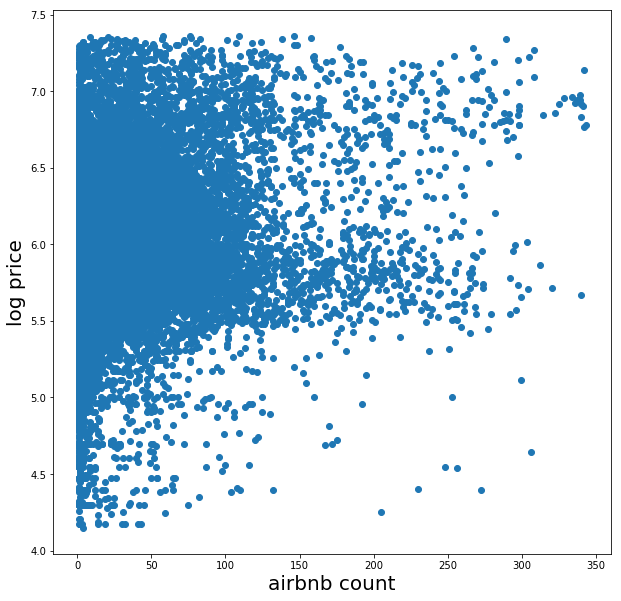

In [89]:
# df1 = df[(df.log_price>6) & (df.log_price<5.5)]
df1 = df[(df.log_price>7) & (df.log_price>7)]

plt.figure(figsize = (10,10))
plt.scatter(df.airbnb_count, df.log_price)
plt.xlabel('airbnb count', fontsize = 20)
plt.ylabel('log price',fontsize = 20)

In [38]:
df.head()

,BBL,ZIP_CODE,NEIGHBORHOOD,SALE_PRICE,YEAR,log_price,year,Borough,id
0,1.000280e+09,10004,FINANCIAL,713500.0,2015,5.853394,2015.0,MN,186
1,1.000290e+09,10004,FINANCIAL,1325000.0,2015,6.122216,2015.0,MN,110
2,1.000300e+09,10004,FINANCIAL,10000000.0,2015,7.000000,2015.0,MN,56
3,1.000390e+09,10005,FINANCIAL,20125000.0,2015,7.303736,2015.0,MN,148
4,1.000640e+09,10005,FINANCIAL,1937500.0,2015,6.287242,2015.0,MN,52


In [59]:
reg1 = smf.ols('log_price ~ log(id) + C(YEAR)', df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3021.
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:11:18   Log-Likelihood:                -15829.
No. Observations:               32784   AIC:                         3.166e+04
Df Residuals:                   32781   BIC:                         3.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6770      0.004   1387.787      0.000       5.669       5.685
C(YEAR)[T.2016]     0.0033      0.004      0.758      0.448      -0.005       0.012
log(id)             0.1030      0.001     77.690      0.000       0.100       0.106
==============================================================================
Omnibus:                     1533.453   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5566.889
Skew:                           0.000   Prob(JB):                         0.00
Kurtosis:                       5.019   Cond. No.                         6.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
reg2 = smf.ols('log_price ~ id + C(ZIP_CODE) + C(YEAR)', df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     70.22
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:47:48   Log-Likelihood:                -13308.
No. Observations:               32784   AIC:                         2.697e+04
Df Residuals:                   32606   BIC:                         2.847e+04
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9393      0.257     23.065      0.000       5.435       6.444
C(ZIP_CODE)[T.10001]     0.0444      0.262      0.169      0.866      -0.469       0.558
C(ZIP_CODE)[T.10002]     0.2356      0.261      0.902      0.367      -0.277       0.748
C(ZIP_CODE)[T.10003]     0.2053      0.259      0.793      0.428      -0.302       0.712
C(ZIP_CODE)[T.10004]     0.2040      0.297      0.686      0.493      -0.379       0.787
C(ZIP_CODE)[T.10005]     0.5982      0.333      1.799      0.072      -0.054       1.250
C(ZIP_CODE)[T.10007]     0.5467      0.282      1.938      0.053      -0.006       1.100
C(ZIP_CODE)[T.10009]     0.1138      0.261      0.437      0.662      -0.397       0.625
C(ZIP_CODE)[T.10010]     0.1947      0.261      0.746      0.456      -0.317       0.706
C(ZIP_CODE)[T.10011]     0.2512      0.258      0.972      0.331      -0.255       0.758
C(ZIP_CODE)[T.10012]     0.3688      0.260      1.419      0.156      -0.141       0.878
C(ZIP_CODE)[T.10013]     0.6096      0.260      2.344      0.019       0.100       1.119
C(ZIP_CODE)[T.10014]     0.2188      0.259      0.845      0.398      -0.289       0.726
C(ZIP_CODE)[T.10016]     0.0346      0.259      0.133      0.894      -0.473       0.542
C(ZIP_CODE)[T.10017]    -0.1774      0.262     -0.677      0.499      -0.691       0.337
C(ZIP_CODE)[T.10018]     0.2434      0.269      0.906      0.365      -0.283       0.770
C(ZIP_CODE)[T.10019]     0.0510      0.260      0.196      0.845      -0.459       0.561
C(ZIP_CODE)[T.10021]     0.2832      0.258      1.096      0.273      -0.223       0.790
C(ZIP_CODE)[T.10022]     0.1345      0.259      0.520      0.603      -0.373       0.642
C(ZIP_CODE)[T.10023]     0.1910      0.259      0.738      0.460      -0.316       0.698
C(ZIP_CODE)[T.10024]     0.1747      0.258      0.677      0.499      -0.331       0.681
C(ZIP_CODE)[T.10025]     0.0868      0.258      0.336      0.737      -0.420       0.593
C(ZIP_CODE)[T.10026]     0.1193      0.260      0.458      0.647      -0.391       0.629
C(ZIP_CODE)[T.10027]     0.1030      0.259      0.398      0.691      -0.405       0.611
C(ZIP_CODE)[T.10028]     0.2282      0.258      0.883      0.377      -0.278       0.735
C(ZIP_CODE)[T.10029]     0.4384      0.260      1.687      0.092      -0.071       0.948
C(ZIP_CODE)[T.10030]     0.2855      0.260      1.098      0.272      -0.224       0.795
C(ZIP_CODE)[T.10031]     0.0946      0.259      0.365      0.715      -0.413       0.602
C(ZIP_CODE)[T.10032]     0.3901      0.260      1.502      0.133      -0.119       0.899
C(ZIP_CODE)[T.10033]     0.1237      0.260      0.476      0.634      -0.386       0.633
C(ZIP_CODE)[T.10034]    -0.0006      0.261     -0.002      0.998      -0.511       0.510
C(ZIP_CODE)[T.10035]     0.2455      0.261      0.939    

In [44]:
reg3 = smf.ols('log_price ~ id + C(NEIGHBORHOOD) + C(YEAR)', df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     55.50
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:48:07   Log-Likelihood:                -13058.
No. Observations:               32784   AIC:                         2.659e+04
Df Residuals:                   32547   BIC:                         2.858e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        5.7942      0.181     32.039      0.000       5.440       6.149
C(NEIGHBORHOOD)[T.ALPHABET CITY            ]     0.1985      0.186      1.068      0.286      -0.166       0.563
C(NEIGHBORHOOD)[T.ARDEN HEIGHTS            ]    -0.3485      0.195     -1.784      0.074      -0.731       0.034
C(NEIGHBORHOOD)[T.ARROCHAR                 ]    -0.0545      0.313     -0.174      0.862      -0.668       0.559
C(NEIGHBORHOOD)[T.ARROCHAR-SHORE ACRES     ]    -0.1256      0.243     -0.518      0.605      -0.601       0.350
C(NEIGHBORHOOD)[T.ARVERNE                  ]    -0.1621      0.182     -0.889      0.374      -0.519       0.195
C(NEIGHBORHOOD)[T.ASTORIA                  ]     0.1630      0.181      0.898      0.369      -0.193       0.519
C(NEIGHBORHOOD)[T.BATH BEACH               ]     0.1235      0.185      0.667      0.505      -0.240       0.487
C(NEIGHBORHOOD)[T.BATHGATE                 ]    -0.2427      0.195     -1.242      0.214      -0.626       0.140
C(NEIGHBORHOOD)[T.BAY RIDGE                ]     0.0653      0.181      0.360      0.719      -0.290       0.421
C(NEIGHBORHOOD)[T.BAYCHESTER               ]    -0.2424      0.184     -1.319      0.187      -0.603       0.118
C(NEIGHBORHOOD)[T.BAYSIDE                  ]     0.0511      0.182      0.280      0.779      -0.307       0.409
C(NEIGHBORHOOD)[T.BEDFORD PARK/NORWOOD     ]    -0.0365      0.183     -0.199      0.842      -0.395       0.322
C(NEIGHBORHOOD)[T.BEDFORD STUYVESANT       ]     0.1764      0.181      0.974      0.330      -0.179       0.531
C(NEIGHBORHOOD)[T.BEECHHURST               ]    -0.0622      0.217     -0.286      0.775      -0.488       0.364
C(NEIGHBORHOOD)[T.BELLE HARBOR             ]     0.0158      0.196      0.080      0.936      -0.368       0.400
C(NEIGHBORHOOD)[T.BELLEROSE                ]    -0.1321      0.187     -0.707      0.479      -0.498       0.234
C(NEIGHBORHOOD)[T.BELMONT                  ]     0.1324      0.186      0.714      0.475      -0.231       0.496
C(NEIGHBORHOOD)[T.BENSONHURST              ]     0.1466      0.182      0.805      0.421      -0.210       0.503
C(NEIGHBORHOOD)[T.BERGEN BEACH             ]    -0.0322      0.187     -0.172      0.863      -0.398       0.334
C(NEIGHBORHOOD)[T.BOERUM HILL              ]     0.4541      0.184      2.468      0.014       0.093       0.815
C(NEIGHBORHOOD)[T.BOROUGH PARK             ]     0.2055      0.182      1.130      0.258      -0.151       0.562
C(NEIGHBORHOOD)[T.BRIARWOOD                ]    -0.2593      0.185     -1.402      0.161      -0.622       0.103
C(NEIGHBORHOOD)[T.BRIGHTON BEACH           ]    -0.1005      0.183     -0.548      0.583      -0.460       0.259
C(NEIGHBORHOOD)[T.BRONX PARK    

In [46]:
from statsmodels.iolib.summary2 import summary_col

In [51]:
results = summary_col([reg1,reg2,reg3],stars=True, float_format='%0.2f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

In [52]:
print(results)


                                             log_price I log_price II log_price III
-----------------------------------------------------------------------------------
C(Borough)[T.BX]                             -0.21***                              
                                             (0.01)                                
C(Borough)[T.MN]                             0.18***                               
                                             (0.01)                                
C(Borough)[T.QN]                             -0.14***                              
                                             (0.01)                                
C(Borough)[T.SI]                             -0.32***                              
                                             (0.01)                                
C(NEIGHBORHOOD)[T.ALPHABET CITY            ]                          0.20         
                                                                      (0.19

In [62]:
df.rename(columns = {'id' : 'airbnb_count'}, inplace = 1)

In [69]:
df.BBL = df.BBL.astype(int)

In [73]:
df.head()

,BBL,ZIP_CODE,NEIGHBORHOOD,SALE_PRICE,YEAR,log_price,year,Borough,airbnb_count
0,1000280001,10004,FINANCIAL,713500.0,2015,5.853394,2015.0,MN,186
1,1000290026,10004,FINANCIAL,1325000.0,2015,6.122216,2015.0,MN,110
2,1000300001,10004,FINANCIAL,10000000.0,2015,7.000000,2015.0,MN,56
3,1000390040,10005,FINANCIAL,20125000.0,2015,7.303736,2015.0,MN,148
4,1000640008,10005,FINANCIAL,1937500.0,2015,6.287242,2015.0,MN,52


In [75]:
df = df.drop('year', 1)

In [78]:
df.head()

,BBL,ZIP_CODE,NEIGHBORHOOD,SALE_PRICE,YEAR,log_price,Borough,airbnb_count
0,1000280001,10004,FINANCIAL,713500.0,2015,5.853394,MN,186
1,1000290026,10004,FINANCIAL,1325000.0,2015,6.122216,MN,110
2,1000300001,10004,FINANCIAL,10000000.0,2015,7.000000,MN,56
3,1000390040,10005,FINANCIAL,20125000.0,2015,7.303736,MN,148
4,1000640008,10005,FINANCIAL,1937500.0,2015,6.287242,MN,52


In [85]:
df[['SALE_PRICE','log_price', 'airbnb_count']].describe().round(2)

,SALE_PRICE,log_price,airbnb_count
count,32784.00,32784.00,32784.00
mean,1334804.11,5.87,23.05
std,2263861.61,0.43,38.96
min,14000.00,4.15,1.00
25%,420000.00,5.62,1.00
50%,700000.00,5.85,5.00
75%,1200000.00,6.08,30.00
max,23009004.00,7.36,343.00


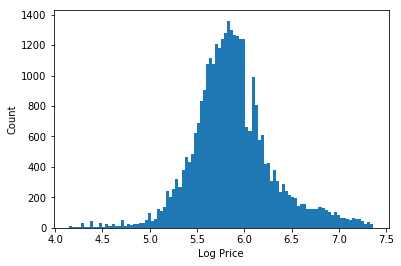

In [93]:
plt.hist(df.log_price, 100);
plt.xlabel('Log Price')
plt.ylabel('Count')